In [69]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
#import dataseet
df=pd.read_csv('E:\\datascience\\datase11\\Edatasciencedatase11.csv')
#changind th dafault values to view all colunms
#pd.options.display.max_columns=24
df.head()


,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,...,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,ReturnReason
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,...,50,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,NaN
1,2019-01-02 20:35:00,1002,Scott Stewart,Female,69,746,3912,China,Shandong,Yantai,...,80,6,Google-ads,2019-01-02 20:50:00,True,2019-01-02 20:58:00,Debit Card,2019-01-02 20:54:00,False,NaN
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,...,20,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,NaN
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,...,20,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,NaN
4,2019-01-05 13:35:00,1005,James Simmons,Male,57,630,3268,China,Shandong,Yantai,...,100,6,Billboard-QR code,2019-01-05 13:40:00,True,2019-01-05 13:52:00,Debit Card,2019-01-05 13:42:00,False,NaN


In [71]:
df.shape

(2000, 23)

In [72]:
#Checking the datatypes of all colunms
df.dtypes

SessionStart             object
CustomerID                int64
FullName                 object
Gender                   object
Age                       int64
CreditScore               int64
MonthlyIncome             int64
Country                  object
State                    object
City                     object
Category                 object
Product                  object
Cost                      int64
Price                     int64
Quantity                  int64
CampaignSchema           object
CartAdditionTime         object
OrderConfirmation          bool
OrderConfirmationTime    object
PaymentMethod            object
SessionEnd               object
OrderReturn              object
ReturnReason             object
dtype: object

In [73]:
#na values or missing values
df.isna().sum()

SessionStart                0
CustomerID                  0
FullName                    0
Gender                      0
Age                         0
CreditScore                 0
MonthlyIncome               0
Country                     0
State                       0
City                        0
Category                    0
Product                     0
Cost                        0
Price                       0
Quantity                    0
CampaignSchema              0
CartAdditionTime            0
OrderConfirmation           0
OrderConfirmationTime     300
PaymentMethod             300
SessionEnd                  0
OrderReturn               300
ReturnReason             1764
dtype: int64

In [74]:
#number of missing cells
df.isna().sum().sum()


2664

In [75]:
#percentage of missing cells
round(df.isna().sum().sum() / df.size * 100, 1)

5.8

In [76]:
#colunms havinf null values 
df[['ReturnReason','OrderReturn','PaymentMethod','OrderConfirmationTime']]

,ReturnReason,OrderReturn,PaymentMethod,OrderConfirmationTime
0,NaN,False,Cash On Delivery,2019-01-01 03:02:00
1,NaN,False,Debit Card,2019-01-02 20:58:00
2,NaN,False,Cash On Delivery,2019-01-04 03:40:00
3,NaN,False,Cash On Delivery,2019-01-05 09:26:00
4,NaN,False,Debit Card,2019-01-05 13:52:00
...,...,...,...,...
1995,NaN,False,Credit Card,2023-12-24 07:07:00
1996,NaN,False,Debit Card,2023-12-25 17:18:00
1997,NaN,False,Debit Card,2023-12-28 05:41:00
1998,NaN,NaN,NaN,NaN


In [77]:
#drop colunm returnReason sice it mostly contains null values
df.drop(['ReturnReason'],axis=1,inplace=True)

In [78]:
#drop the rows which have nan values
df.dropna(inplace=True)

In [79]:
#adding a nwe colunm which gives the total price
df['TotalPrice']=df['Price']*df['Quantity']

In [80]:
#selecting first 5 rows to viwe usinf iloc
df.iloc[0:]

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,...,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,TotalPrice
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,...,50,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,200
1,2019-01-02 20:35:00,1002,Scott Stewart,Female,69,746,3912,China,Shandong,Yantai,...,80,6,Google-ads,2019-01-02 20:50:00,True,2019-01-02 20:58:00,Debit Card,2019-01-02 20:54:00,False,480
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,...,20,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,40
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,...,20,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,40
4,2019-01-05 13:35:00,1005,James Simmons,Male,57,630,3268,China,Shandong,Yantai,...,100,6,Billboard-QR code,2019-01-05 13:40:00,True,2019-01-05 13:52:00,Debit Card,2019-01-05 13:42:00,False,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2023-12-22 16:41:00,2197,Mr. Matthew Perez MD,Female,35,613,4948,Canada,Ontario,Toronto,...,100,1,Facebook-ads,2023-12-22 16:52:00,True,2023-12-22 17:00:00,Debit Card,2023-12-22 16:56:00,False,100
1995,2023-12-24 06:49:00,1671,Daniel Jordan,Female,72,705,5746,China,Shandong,Jinan,...,50,1,Twitter-ads,2023-12-24 07:02:00,True,2023-12-24 07:07:00,Credit Card,2023-12-24 07:04:00,False,50
1996,2023-12-25 16:38:00,1778,Shawn Edwards,Female,67,743,6481,Canada,Ontario,Mississauga,...,1500,2,E-mails,2023-12-25 17:07:00,True,2023-12-25 17:18:00,Debit Card,2023-12-25 17:12:00,False,3000
1997,2023-12-28 05:09:00,1253,Michelle Friedman,Male,35,610,6169,Italy,Lazio,Latina,...,1500,3,Twitter-ads,2023-12-28 05:36:00,True,2023-12-28 05:41:00,Debit Card,2023-12-28 05:40:00,False,4500


In [81]:
#summary of the data
df.describe()

,CustomerID,Age,CreditScore,MonthlyIncome,Cost,Price,Quantity,TotalPrice
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,1614.432353,44.605882,690.251765,5606.441176,133.160588,206.985882,3.549412,755.072353
std,351.946170,16.394165,51.068225,1448.135731,257.840154,388.213990,1.690755,1596.435557
min,1001.000000,18.000000,600.000000,3001.000000,5.000000,8.000000,1.000000,8.000000
25%,1313.750000,31.000000,645.000000,4428.250000,15.000000,25.000000,2.000000,75.000000
50%,1619.500000,44.000000,692.000000,5689.000000,30.000000,50.000000,4.000000,150.000000
75%,1922.250000,59.000000,733.000000,6871.000000,60.000000,100.000000,5.000000,400.000000
max,2200.000000,72.000000,780.000000,7999.000000,1000.000000,1500.000000,6.000000,9000.000000


In [82]:
#all columns
df.columns

Index(['SessionStart', 'CustomerID', 'FullName', 'Gender', 'Age',
       'CreditScore', 'MonthlyIncome', 'Country', 'State', 'City', 'Category',
       'Product', 'Cost', 'Price', 'Quantity', 'CampaignSchema ',
       'CartAdditionTime', 'OrderConfirmation', 'OrderConfirmationTime',
       'PaymentMethod', 'SessionEnd', 'OrderReturn', 'TotalPrice'],
      dtype='object')

In [83]:
#Correcting error in column name
df.rename(columns={'CampaignSchema ':'CampaignSchema'},inplace=True)

In [84]:
#unique values in category column
df['Category'].unique()

array(['electronics', 'fashion', 'toys', 'home appliances', 'books'],
      dtype=object)

In [85]:
#unique values in PaymentMethods
df['PaymentMethod'].unique()

array(['Cash On Delivery', 'Debit Card', 'Credit Card', 'Paypal'],
      dtype=object)

In [86]:
#uniqe values in gender column
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [87]:
#Campaign schemas included
df['CampaignSchema'].unique()

array(['Instagram-ads', 'Google-ads', 'Facebook-ads', 'Twitter-ads',
       'Billboard-QR code', 'E-mails'], dtype=object)

In [88]:
#countries
df['Country'].unique()

array(['China', 'UK', 'India', 'Spain', 'USA', 'Japan', 'Australia',
       'Italy', 'Canada'], dtype=object)

In [89]:
#states
df['State'].unique()

array(['Guangdong', 'Shandong', 'England', 'Maharashtra', 'Scotland',
       'Catalonia', 'California', 'Kanagawa', 'New South Wales',
       'Lombardy', 'Texas', 'Lazio', 'Ontario', 'Andalusia', 'Tokyo',
       'Quebec', 'Uttar Pradesh', 'Victoria'], dtype=object)

In [90]:
#cities
df['City'].unique()

array(['Dongguan', 'Yantai', 'Birmingham', 'Nagpur', 'Edinburgh',
       'Mumbai', 'Barcelona', 'San Jose', 'Sagamihara', 'Wollongong',
       'Pune', 'Brescia', 'San Antonio', 'Frosinone', 'Dallas',
       'Shenzhen', 'Kawasaki', 'San Diego', 'Mississauga', 'Toronto',
       'Granada', 'Yokohama', 'Laval', 'Seville', 'Tarragona', 'Kanpur',
       'Qingdao', 'Newcastle', 'Montreal', 'Latina', 'Jinan', 'Milan',
       'Ballarat', 'Tokyo', 'Bergamo', 'Los Angeles', 'Glasgow',
       'Guangzhou', 'Aberdeen', 'Geelong', 'Sydney', 'Ottawa', 'Rome',
       'Girona', 'Houston', 'Quebec City', 'Lucknow', 'Malaga',
       'Manchester', 'London', 'Ghaziabad', 'Melbourne'], dtype=object)

In [91]:
#unique no of costumers
len(df['CustomerID'].unique())

1103

In [92]:
#setting colunms to datetime format
df['SessionStart']=pd.to_datetime(df['SessionStart'])
df['SessionEnd']=pd.to_datetime(df['SessionEnd'])
df['OrderConfirmationTime']=pd.to_datetime(df['OrderConfirmationTime'])
df['CartAdditionTime']=pd.to_datetime(df['CartAdditionTime'])
df.dtypes

SessionStart             datetime64[ns]
CustomerID                        int64
FullName                         object
Gender                           object
Age                               int64
CreditScore                       int64
MonthlyIncome                     int64
Country                          object
State                            object
City                             object
Category                         object
Product                          object
Cost                              int64
Price                             int64
Quantity                          int64
CampaignSchema                   object
CartAdditionTime         datetime64[ns]
OrderConfirmation                  bool
OrderConfirmationTime    datetime64[ns]
PaymentMethod                    object
SessionEnd               datetime64[ns]
OrderReturn                      object
TotalPrice                        int64
dtype: object

In [93]:
#looking into the values [resent in each columns
for i in df.columns:
    print(i)
    print(df[i].value_counts())

SessionStart
SessionStart
2019-01-01 02:42:00    1
2022-05-30 00:37:00    1
2022-05-28 08:36:00    1
2022-05-26 15:18:00    1
2022-05-25 20:42:00    1
                      ..
2020-09-11 15:55:00    1
2020-09-11 09:09:00    1
2020-09-10 10:48:00    1
2020-09-10 04:17:00    1
2023-12-31 08:01:00    1
Name: count, Length: 1700, dtype: int64
CustomerID
CustomerID
1993    4
1764    4
1594    4
1952    4
1464    4
       ..
1562    1
1563    1
1564    1
1567    1
1253    1
Name: count, Length: 1103, dtype: int64
FullName
FullName
Crystal Mitchell     4
Phillip Vazquez      4
Keith Sanchez        4
Katrina Edwards      4
Bonnie Fisher        4
                    ..
Elizabeth Hardy      1
Gloria Moore         1
Joshua Vargas        1
Krystal Burton       1
Michelle Friedman    1
Name: count, Length: 1103, dtype: int64
Gender
Gender
Female    879
Male      821
Name: count, dtype: int64
Age
Age
69    50
66    49
21    47
36    47
33    45
25    44
68    44
22    42
19    40
37    40
44    38
5

In [94]:
#correlation
df[['Age','CreditScore','MonthlyIncome','Cost','Price','Quantity']].corr()

,Age,CreditScore,MonthlyIncome,Cost,Price,Quantity
Age,1.000000,-0.039935,-0.005674,-0.025437,-0.024643,0.034317
CreditScore,-0.039935,1.000000,0.002193,0.002409,0.000719,0.036884
MonthlyIncome,-0.005674,0.002193,1.000000,0.025360,0.025986,-0.020065
Cost,-0.025437,0.002409,0.025360,1.000000,0.999522,0.030000
Price,-0.024643,0.000719,0.025986,0.999522,1.000000,0.031089
Quantity,0.034317,0.036884,-0.020065,0.030000,0.031089,1.000000


In [95]:
#shape of data after cleaning
df.shape

(1700, 23)

In [96]:
#tital revenue generated
total_revenue=df['Price']*df['Quantity']
total_revenue.sum()

1283623

In [97]:
#number of males
male=df['Gender']=='Male'
male.sum()


821

In [98]:
#numbe of females
female=df['Gender']=='Female'
female.sum()

879

Visualization

<Axes: xlabel='Gender', ylabel='count'>

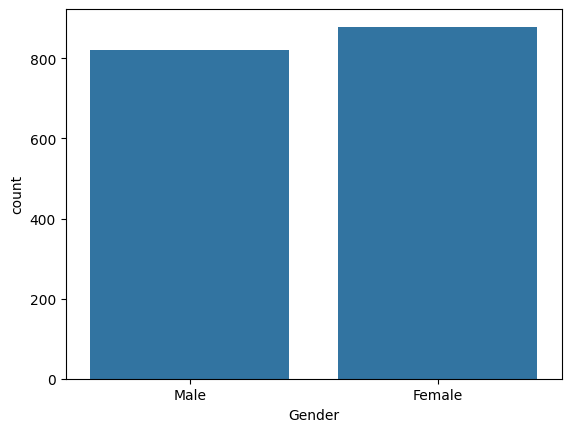

In [99]:
#count plot to obseve the number of male and female costumers
sns.countplot(x=df['Gender'])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Instagram-ads'),
  Text(1, 0, 'Google-ads'),
  Text(2, 0, 'Facebook-ads'),
  Text(3, 0, 'Twitter-ads'),
  Text(4, 0, 'Billboard-QR code'),
  Text(5, 0, 'E-mails')])

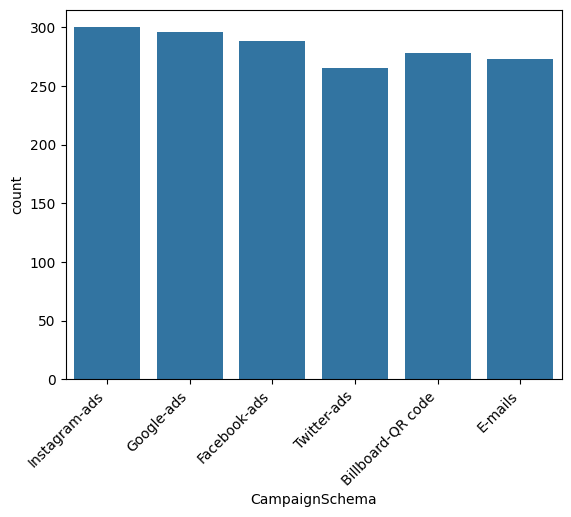

In [100]:
#count plot to understand the different add campaigns and the range of buyers from a specific campaign
sns.countplot(x=df.CampaignSchema)
plt.xticks(rotation=45, ha='right')


Text(0.5, 1.0, 'Sales per category')

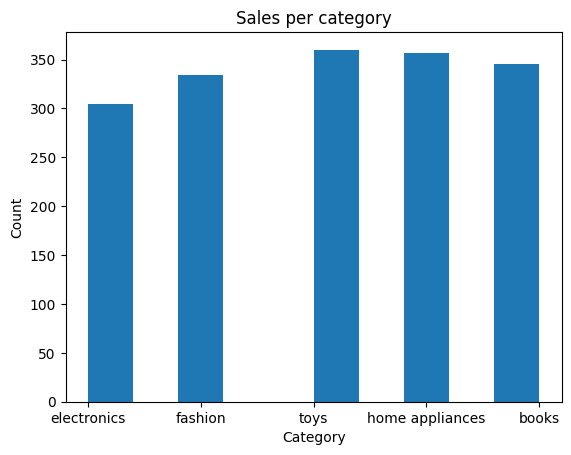

In [101]:
#histohram to understand different product categories and sales
plt.hist(df.Category)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Sales per category')

<BarContainer object of 1700 artists>

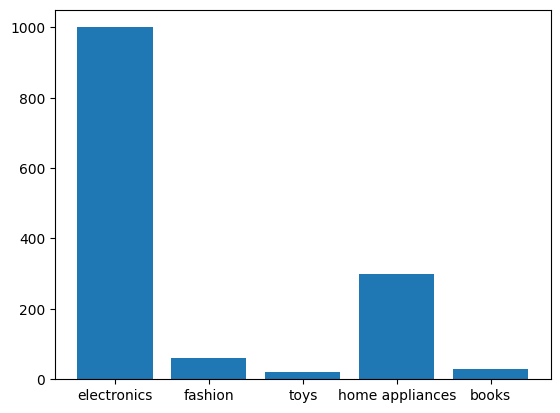

In [102]:
#bar plot to visualize the relation bw diff categoties and their price
plt.bar(df.Category,df.Cost)

(array([408.,   0.,   0., 528.,   0.,   0., 583.,   0.,   0., 181.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

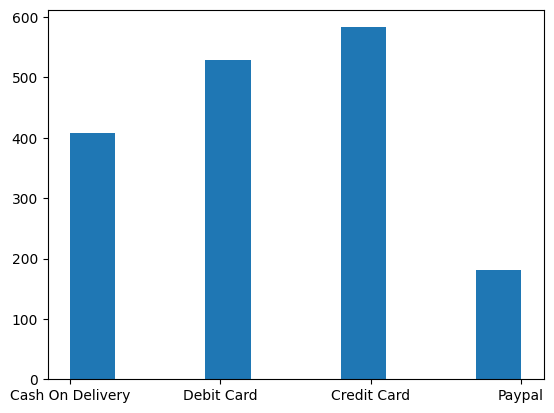

In [103]:
#histogram to understand diff payment methods used by costumers
plt.hist(df.PaymentMethod)

Text(0, 0.5, 'Price')

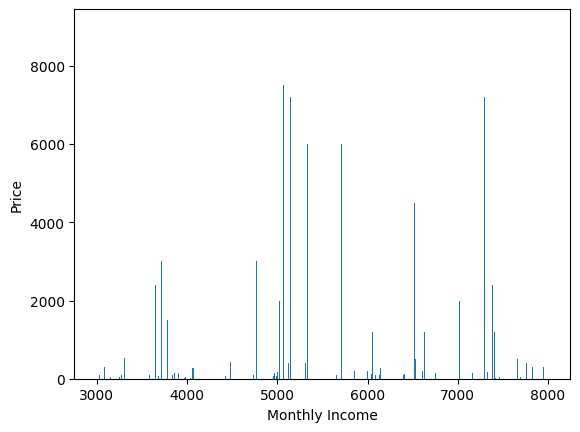

In [116]:
#relation bw monthly income and purchased price
plt.bar(df.MonthlyIncome,df.TotalPrice)
plt.xlabel('Monthly Income')
plt.ylabel('Price')

In [ ]:
#filtering peoples who used cash on delivery as payment method
cod=df[df['PaymentMethod']=='Cash On Delivery']
cod.head() 

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,...,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,TotalPrice
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,...,50,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,200
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,...,20,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,40
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,...,20,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,40
8,2019-01-09 16:29:00,1009,Justin Hardin,Male,59,609,3003,Spain,Catalonia,Barcelona,...,80,1,Billboard-QR code,2019-01-09 16:47:00,True,2019-01-09 16:58:00,Cash On Delivery,2019-01-09 16:52:00,True,80
10,2019-01-13 15:41:00,1011,Zachary Roberts,Male,60,634,6753,USA,California,San Jose,...,80,1,Billboard-QR code,2019-01-13 16:08:00,True,2019-01-13 16:16:00,Cash On Delivery,2019-01-13 16:12:00,True,80


In [ ]:
#summary
cod.describe(include='all')

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,...,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,TotalPrice
count,408,408.000000,408,408,408.000000,408.000000,408.000000,408,408,408,...,408.000000,408.000000,408,408,408,408,408,408,408,408.000000
unique,NaN,NaN,361,2,NaN,NaN,NaN,9,18,52,...,NaN,NaN,6,NaN,1,NaN,1,NaN,2,NaN
top,NaN,NaN,Sherry Garza,Female,NaN,NaN,NaN,Canada,Maharashtra,Kawasaki,...,NaN,NaN,Twitter-ads,NaN,True,NaN,Cash On Delivery,NaN,False,NaN
freq,NaN,NaN,3,214,NaN,NaN,NaN,56,30,15,...,NaN,NaN,78,NaN,408,NaN,408,NaN,356,NaN
mean,2021-08-07 21:00:23.529412096,1620.526961,NaN,NaN,44.000000,687.742647,5785.080882,NaN,NaN,NaN,...,207.825980,3.514706,NaN,2021-08-07 21:18:11.764706048,NaN,2021-08-07 21:28:01.323529472,NaN,2021-08-07 21:21:45.735294208,NaN,784.894608
min,2019-01-01 02:42:00,1001.000000,NaN,NaN,18.000000,600.000000,3003.000000,NaN,NaN,NaN,...,8.000000,1.000000,NaN,2019-01-01 02:49:00,NaN,2019-01-01 03:02:00,NaN,2019-01-01 02:53:00,NaN,8.000000
25%,2020-06-12 19:33:15,1291.500000,NaN,NaN,29.000000,642.000000,4672.750000,NaN,NaN,NaN,...,25.000000,2.000000,NaN,2020-06-12 20:00:45,NaN,2020-06-12 20:05:45,NaN,2020-06-12 20:02:45,NaN,70.000000
50%,2021-08-24 01:17:00,1658.500000,NaN,NaN,44.000000,685.500000,5979.500000,NaN,NaN,NaN,...,50.000000,4.000000,NaN,2021-08-24 01:42:30,NaN,2021-08-24 01:51:30,NaN,2021-08-24 01:47:30,NaN,150.000000
75%,2022-11-02 00:56:15,1929.250000,NaN,NaN,58.000000,732.250000,7033.750000,NaN,NaN,NaN,...,90.000000,5.000000,NaN,2022-11-02 01:22:30,NaN,2022-11-02 01:29:00,NaN,2022-11-02 01:27:15,NaN,420.000000
max,2023-12-22 00:26:00,2200.000000,NaN,NaN,72.000000,780.000000,7998.000000,NaN,NaN,NaN,...,1500.000000,6.000000,NaN,2023-12-22 00:38:00,NaN,2023-12-22 00:43:00,NaN,2023-12-22 00:42:00,NaN,9000.000000


In [ ]:
#converting the campaignschema colunm into numerical values as a new colunm for further analysis and visualization
df['CampaignSchema_num']=df['CampaignSchema'].replace({'Instagram-ads':1,'Facebook-ads':2,'Twitter-ads':3,'Billboard-QR code':4,'Google-ads':5,'E-mails':6})
df.head()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_21488\3771456169.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CampaignSchema_num']=df['CampaignSchema'].replace({'Instagram-ads':1,'Facebook-ads':2,'Twitter-ads':3,'Billboard-QR code':4,'Google-ads':5,'E-mails':6})


,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,...,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,TotalPrice,CampaignSchema_num
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,...,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,200,1
1,2019-01-02 20:35:00,1002,Scott Stewart,Female,69,746,3912,China,Shandong,Yantai,...,6,Google-ads,2019-01-02 20:50:00,True,2019-01-02 20:58:00,Debit Card,2019-01-02 20:54:00,False,480,5
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,...,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,40,2
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,...,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,40,3
4,2019-01-05 13:35:00,1005,James Simmons,Male,57,630,3268,China,Shandong,Yantai,...,6,Billboard-QR code,2019-01-05 13:40:00,True,2019-01-05 13:52:00,Debit Card,2019-01-05 13:42:00,False,600,4


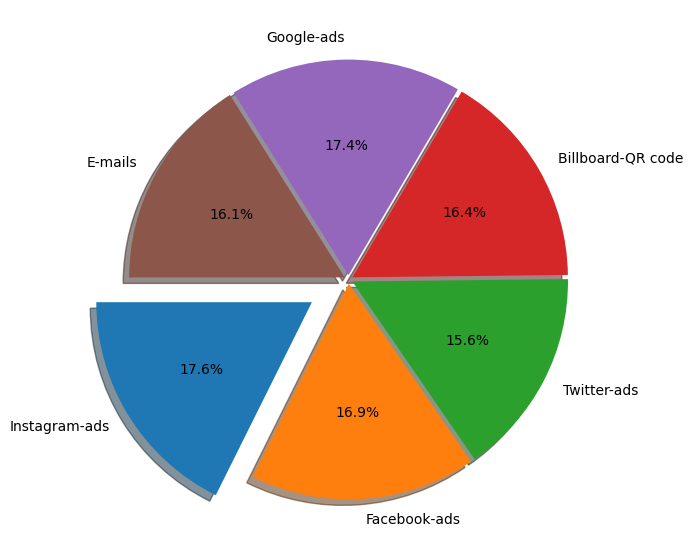

In [ ]:
#pie plot to understand the sales occoured from different campaigns

data=df.groupby('CampaignSchema_num').groups
data
# Calculate the sizes of each group
sizes = [len(data[key]) for key in data]
labels = ['Instagram-ads','Facebook-ads','Twitter-ads','Billboard-QR code','Google-ads','E-mails']
expl=[0.2,0.02,0.02,0.02,0.02,0.02]

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes,labels=labels, autopct='%1.1f%%',explode=expl, startangle=180,shadow=True)
plt.show()

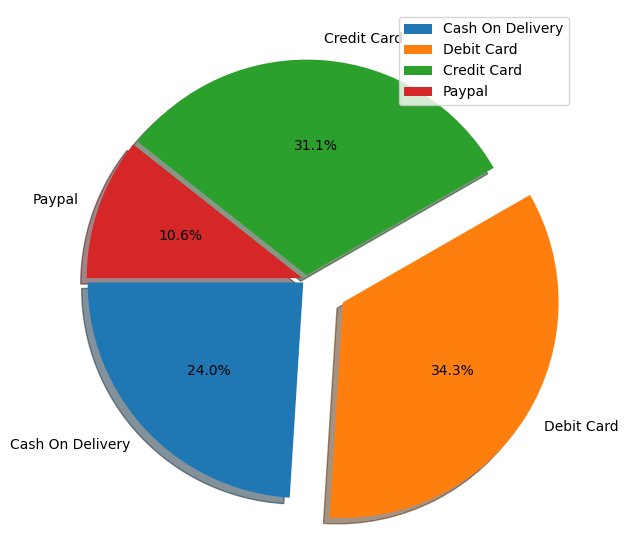

In [ ]:
#pie plot to visualize the diff payment methods used


#grouping data
pymtd=df.groupby('PaymentMethod').groups
#Counting data under each group
size1=[len(pymtd[key]) for key in pymtd]

lbl=['Cash On Delivery','Debit Card','Credit Card','Paypal']
expld=[.02,.2,.02,.02]
plt.figure(figsize=(10, 7))
plt.pie(size1,labels=lbl,explode=expld, autopct='%1.1f%%', startangle=180,shadow=True)
plt.legend()

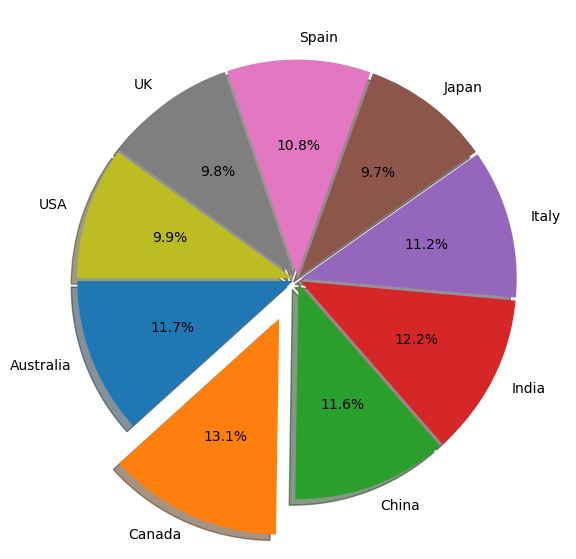

In [118]:
#pie plot showing the amound of total sales from diff countries

cntry=df.groupby(df.Country).groups
size2=[len(cntry[key]) for key in cntry]
lbl2=['Australia','Canada', 'China', 'India', 'Italy', 'Japan', 'Spain','UK', 'USA']
expl2=[.02,.2,.02,.02,.02,.02,.02,.02,.02]
plt.figure(figsize=(10,7))
plt.pie(size2,labels=lbl2,explode=expl2,autopct='%1.1f%%',startangle=180,shadow=True)
plt.show()

In [120]:
#order returned and not
retrn=df.groupby(df['OrderReturn']).groups
print(retrn)
orderReturn=[len(retrn[key]) for key in retrn]
orderReturn

{False: [0, 1, 2, 3, 4, 5, 7, 11, 12, 13, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 38, 39, 40, 41, 44, 45, 46, 47, 49, 50, 53, 54, 55, 57, 58, 59, 60, 61, 62, 64, 65, 67, 68, 70, 71, 72, 73, 74, 75, 78, 79, 81, 82, 83, 84, 86, 87, 89, 92, 93, 94, 95, 100, 102, 103, 104, 106, 107, 108, 110, 111, 112, 113, 116, 117, 119, 120, 121, 122, 123, 124, 125, 127, 129, 130, 132, 135, 136, 137, 139, 140, 141, ...], True: [6, 8, 10, 14, 37, 42, 43, 51, 69, 76, 77, 80, 88, 91, 98, 101, 105, 114, 115, 118, 128, 131, 138, 168, 169, 180, 188, 189, 196, 206, 211, 217, 225, 242, 244, 247, 249, 255, 264, 268, 270, 281, 282, 297, 299, 305, 320, 321, 327, 329, 339, 359, 380, 382, 383, 389, 392, 397, 399, 406, 408, 425, 429, 435, 437, 448, 455, 461, 464, 467, 479, 484, 486, 505, 508, 536, 543, 556, 560, 586, 601, 610, 612, 621, 629, 647, 653, 657, 659, 666, 687, 691, 707, 708, 732, 739, 758, 765, 772, 783, ...]}


[1464, 236]

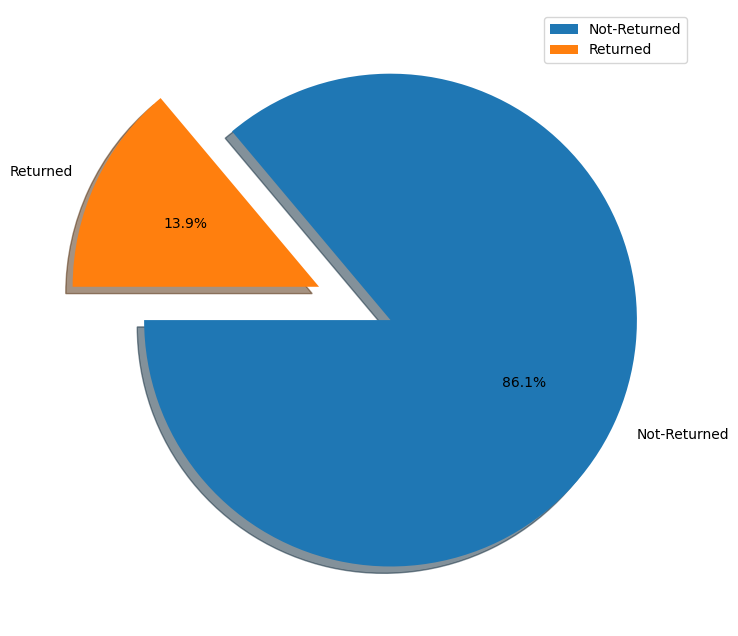

In [ ]:
#pie plot showing the returned and non returned products

retrn=df.groupby('OrderReturn').groups
size3=[len(retrn[key]) for key in retrn]
lbl3=['Not-Returned','Returned']
expl3=[.02,.3]
plt.figure(figsize=(10,8))
plt.pie(size3,labels=lbl3,explode=expl3,autopct='%1.1f%%',startangle=180,shadow=True)
plt.legend()
plt.show()

(array([49.,  0., 51.,  0.,  0., 50.,  0., 50.,  0., 36.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

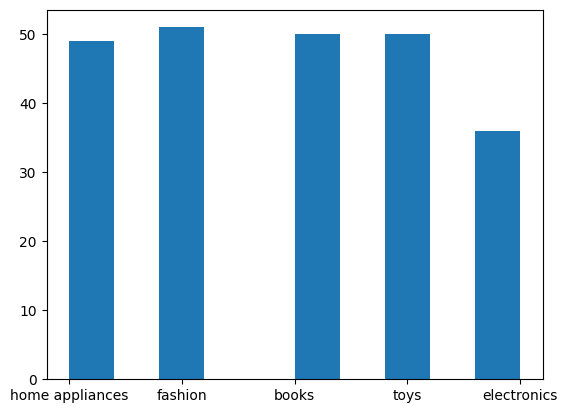

In [ ]:
#plot to understand returnrd product categories
orderReturn_df=df[df['OrderReturn']]
plt.hist(orderReturn_df['Category'])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Google-ads'),
  Text(1, 0, 'Billboard-QR code'),
  Text(2, 0, 'Twitter-ads'),
  Text(3, 0, 'E-mails'),
  Text(4, 0, 'Facebook-ads'),
  Text(5, 0, 'Instagram-ads')])

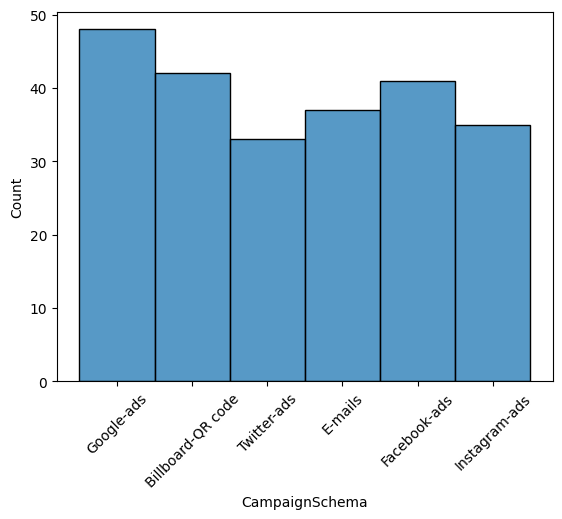

In [ ]:
#plot to understand products brought through which campaign schema are returned most  
sns.histplot(orderReturn_df['CampaignSchema'])
plt.xticks(rotation=45)

Time data analysis

In [ ]:
#time spend by costumers durig purchase
[df['SessionEnd']-df['SessionStart']]

[0      0 days 00:11:00
 1      0 days 00:19:00
 2      0 days 00:24:00
 3      0 days 00:19:00
 4      0 days 00:07:00
              ...      
 1994   0 days 00:15:00
 1995   0 days 00:15:00
 1996   0 days 00:34:00
 1997   0 days 00:31:00
 1999   0 days 00:27:00
 Length: 1700, dtype: timedelta64[ns]]

In [ ]:
#how many customers end the session within 10 mins from session start?
min10=df[df['SessionEnd']-df['SessionStart']<=pd.Timedelta(minutes=10)]
len(min10['CustomerID'])

142

In [ ]:
#how many customers end the session within 15 mins from session start?
min15=df[df['OrderConfirmationTime']-df['SessionStart']<=pd.Timedelta(minutes=15)]
len(min15['CustomerID'])

120

In [ ]:
#number of costumers who spend more than 20 minutes
min20=df[df['SessionEnd']-df['SessionStart']>=pd.Timedelta(minutes=20)]
len(min20['CustomerID'])

941

In [ ]:
#sales ineach month
monthly_sales=df.groupby(df['SessionStart'].dt.month).groups
[len(monthly_sales[key]) for key in monthly_sales]

[136, 132, 131, 138, 144, 147, 154, 157, 139, 138, 126, 158]

Text(0.5, 1.0, 'Monthly sales')

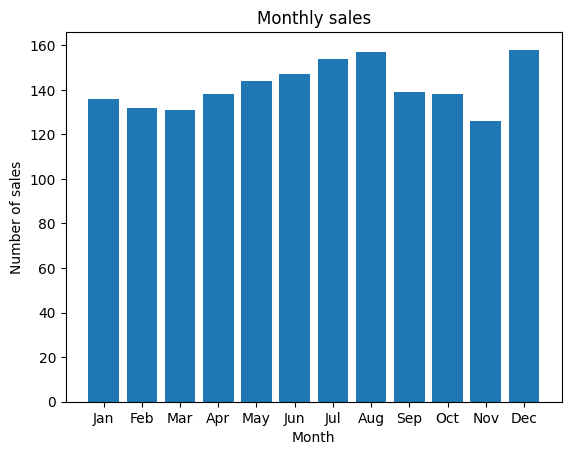

In [ ]:
#bar plot to understand the sales in each month
monthly_sales_each=[136, 132, 131, 138, 144, 147, 154, 157, 139, 138, 126, 158]
month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales_df=pd.DataFrame({'month':month,'sales':monthly_sales_each})
monthly_sales_df

plt.bar(monthly_sales_df['month'],monthly_sales_df['sales'])
plt.xlabel('Month')
plt.ylabel('Number of sales')
plt.title('Monthly sales')

In [ ]:
#costumers who brought their product in tne month of january
jan=df[df['SessionStart'].dt.month==1]
jan.head()

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,...,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,TotalPrice,CampaignSchema_num
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,...,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,200,1
1,2019-01-02 20:35:00,1002,Scott Stewart,Female,69,746,3912,China,Shandong,Yantai,...,6,Google-ads,2019-01-02 20:50:00,True,2019-01-02 20:58:00,Debit Card,2019-01-02 20:54:00,False,480,5
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,...,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,40,2
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,...,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,40,3
4,2019-01-05 13:35:00,1005,James Simmons,Male,57,630,3268,China,Shandong,Yantai,...,6,Billboard-QR code,2019-01-05 13:40:00,True,2019-01-05 13:52:00,Debit Card,2019-01-05 13:42:00,False,600,4


In [ ]:
#similarly in all months
feb=df[df['SessionStart'].dt.month==2]
mar=df[df['SessionStart'].dt.month==3]
apr=df[df['SessionStart'].dt.month==4]
may=df[df['SessionStart'].dt.month==5]
jun=df[df['SessionStart'].dt.month==6]
jul=df[df['SessionStart'].dt.month==7]
aug=df[df['SessionStart'].dt.month==8]
sep=df[df['SessionStart'].dt.month==9]
oct=df[df['SessionStart'].dt.month==10]
nov=df[df['SessionStart'].dt.month==11]
dec=df[df['SessionStart'].dt.month==12]

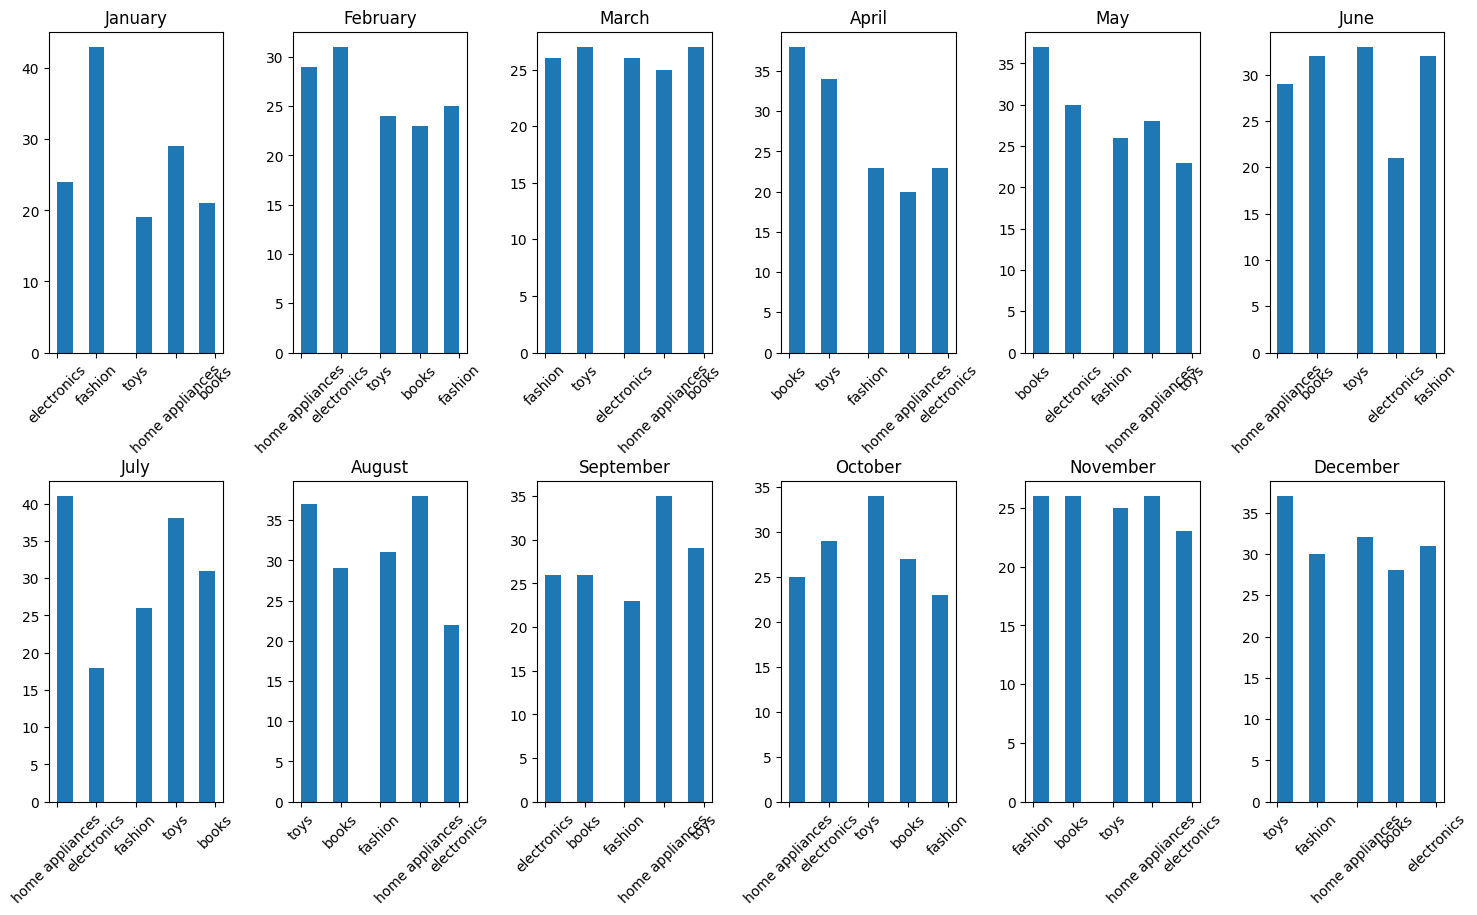

In [ ]:
#ploting sales in each month to analyze diff catogories sold in each month
def graph(month):
    plt.hist(month.Category)

# Adjusting the figure size and layout
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2, 6, 1)
graph(jan)
plt.title('January')
plt.xticks(rotation=45)

plt.subplot(2, 6, 2)
graph(feb)
plt.title('February')
plt.xticks(rotation=45)

plt.subplot(2, 6, 3)
graph(mar)
plt.title('March')
plt.xticks(rotation=45)

plt.subplot(2, 6, 4)
graph(apr)
plt.title('April')
plt.xticks(rotation=45)

plt.subplot(2, 6, 5)
graph(may)
plt.title('May')
plt.xticks(rotation=45)

plt.subplot(2, 6, 6)
graph(jun)
plt.title('June')
plt.xticks(rotation=45)

plt.subplot(2, 6, 7)
graph(jul)
plt.title('July')
plt.xticks(rotation=45)

plt.subplot(2, 6, 8)
graph(aug)
plt.title('August')
plt.xticks(rotation=45)

plt.subplot(2, 6, 9)
graph(sep)
plt.title('September')
plt.xticks(rotation=45)

plt.subplot(2, 6, 10)
graph(oct)
plt.title('October')
plt.xticks(rotation=45)

plt.subplot(2, 6, 11)
graph(nov)
plt.title('November')
plt.xticks(rotation=45)

plt.subplot(2, 6, 12)
graph(dec)
plt.title('December')
plt.xticks(rotation=45)

plt.show()


In [ ]:
#ploting sales on ech days of the week
week=df.groupby([df['OrderConfirmationTime'].dt.weekday]).groups
[len(week[key]) for key in week]

[198, 270, 250, 264, 264, 228, 226]

Text(0, 0.5, 'Sales')

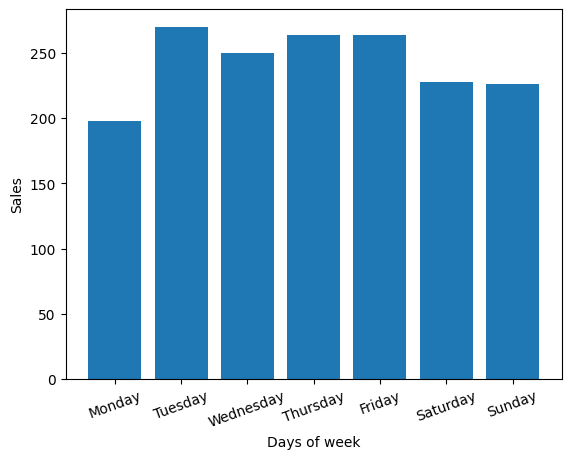

In [ ]:
weekly_sale=[198, 270, 250, 264, 264, 228, 226]
weeks=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

weekly_sale_df=pd.DataFrame({'Weeks':weeks,'Sales':weekly_sale})
weekly_sale_df

plt.bar(weekly_sale_df['Weeks'],weekly_sale_df['Sales'])
plt.xticks(rotation=20)
plt.xlabel('Days of week')
plt.ylabel('Sales')

In [ ]:
#ploting sales on each year
sales_yearly_grp=df.groupby([df['OrderConfirmationTime'].dt.year]).groups
sales_yearly_list=[len(sales_yearly_grp[key]) for key in sales_yearly_grp]
sales_yearly_list

[305, 355, 372, 331, 337]

Text(0.5, 1.0, 'Yearly sales')

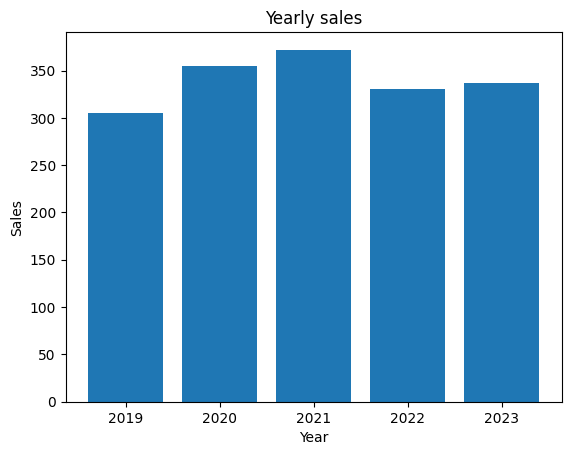

In [ ]:
yealy_sales_count=[305, 355, 372, 331, 337]
years_list=['2019','2020','2021','2022','2023']
yealy_sales_df=pd.DataFrame({'Yearly Sales':yealy_sales_count,'Year':years_list})

plt.bar(yealy_sales_df['Year'],yealy_sales_df['Yearly Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Yearly sales')

In [ ]:
#costumers based on age groups 

df['Age'].describe()

count    1700.000000
mean       44.605882
std        16.394165
min        18.000000
25%        31.000000
50%        44.000000
75%        59.000000
max        72.000000
Name: Age, dtype: float64

In [ ]:
age=df['Age']
age_grp=pd.cut(age,bins=[18,28,39,50,61,72],right=True,include_lowest=True)

<Axes: xlabel='Age', ylabel='count'>

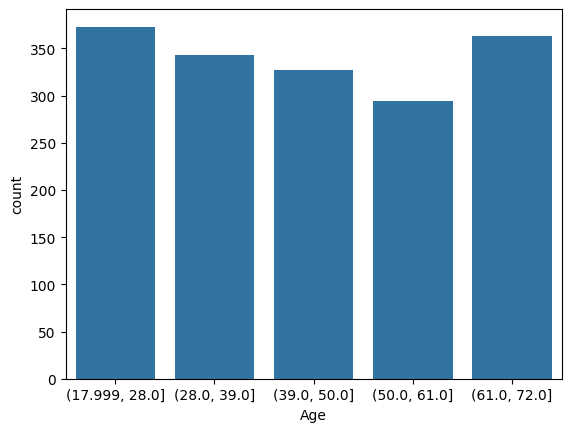

In [ ]:
#plot to understand diff age groups and number of costumers in that group
sns.countplot(x=age_grp)

In [ ]:
#grouping customers using age range
age_18_28=df.groupby('Age').filter(lambda x: x.name in range (18,29))
age_28_39=df.groupby('Age').filter(lambda x: x.name in range (28,40))
age_39_50=df.groupby('Age').filter(lambda x: 39<=x.name<=50)
age_50_61=df.groupby('Age').filter(lambda x: 50<=x.name<=61)
age_61_72=df[(df['Age']>=61) & (df['Age']<=72)]

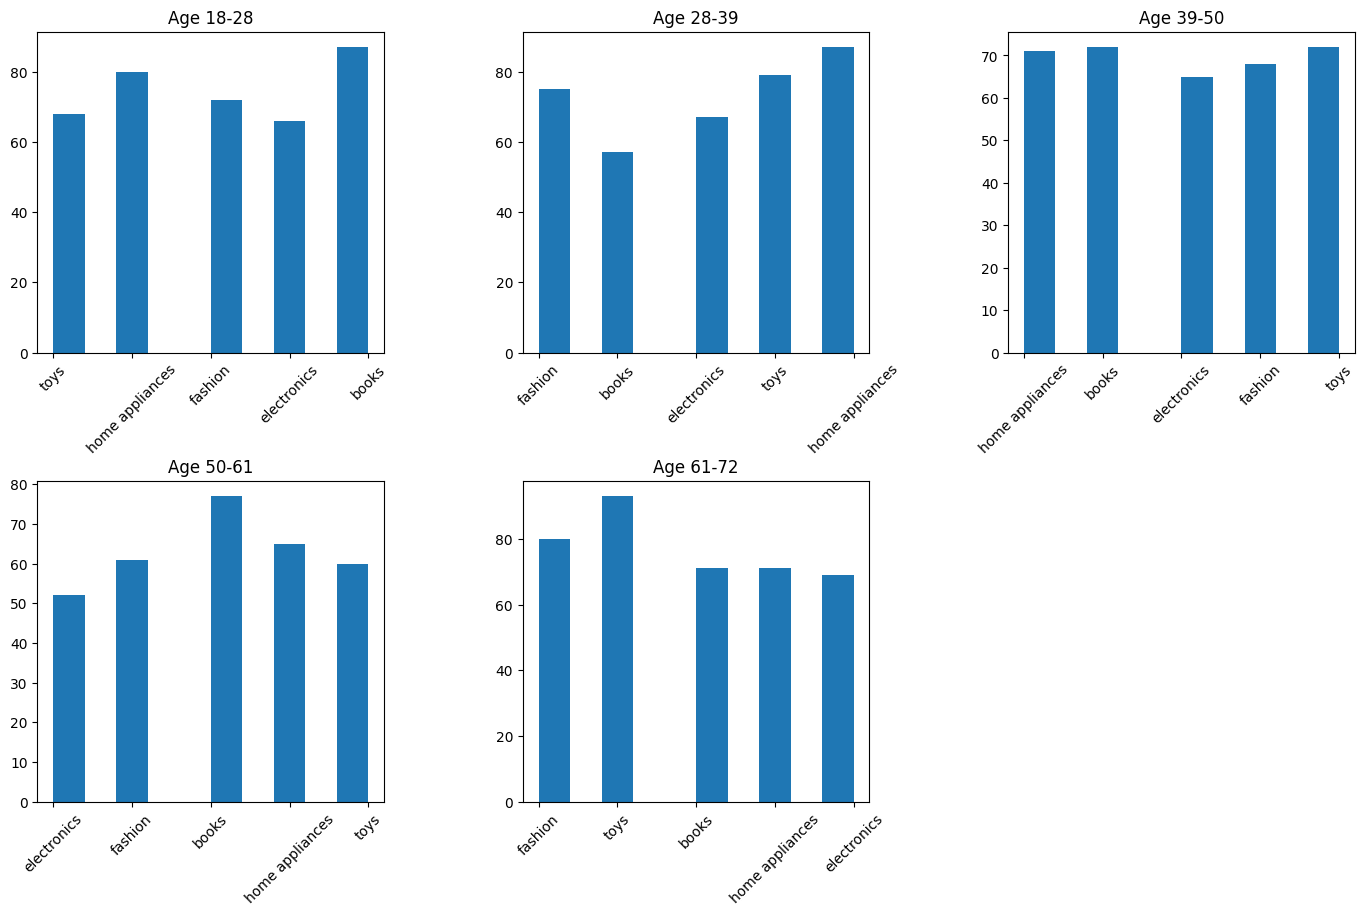

In [ ]:
#plot to understand diff age groups and how the category of items brought vary on diff age groups

plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=0.4 ,wspace=0.4)

plt.subplot(231)
plt.hist(age_18_28['Category'])
plt.title('Age 18-28')
plt.xticks(rotation=45)

plt.subplot(232)
plt.hist(age_28_39['Category'])
plt.title('Age 28-39')
plt.xticks(rotation=45)

plt.subplot(233)
plt.hist(age_39_50['Category'])
plt.title('Age 39-50')
plt.xticks(rotation=45)

plt.subplot(234)
plt.hist(age_50_61['Category'])
plt.title('Age 50-61')
plt.xticks(rotation=45)

plt.subplot(235)
plt.hist(age_61_72['Category'])
plt.title('Age 61-72')
plt.xticks(rotation=45)
plt.show()

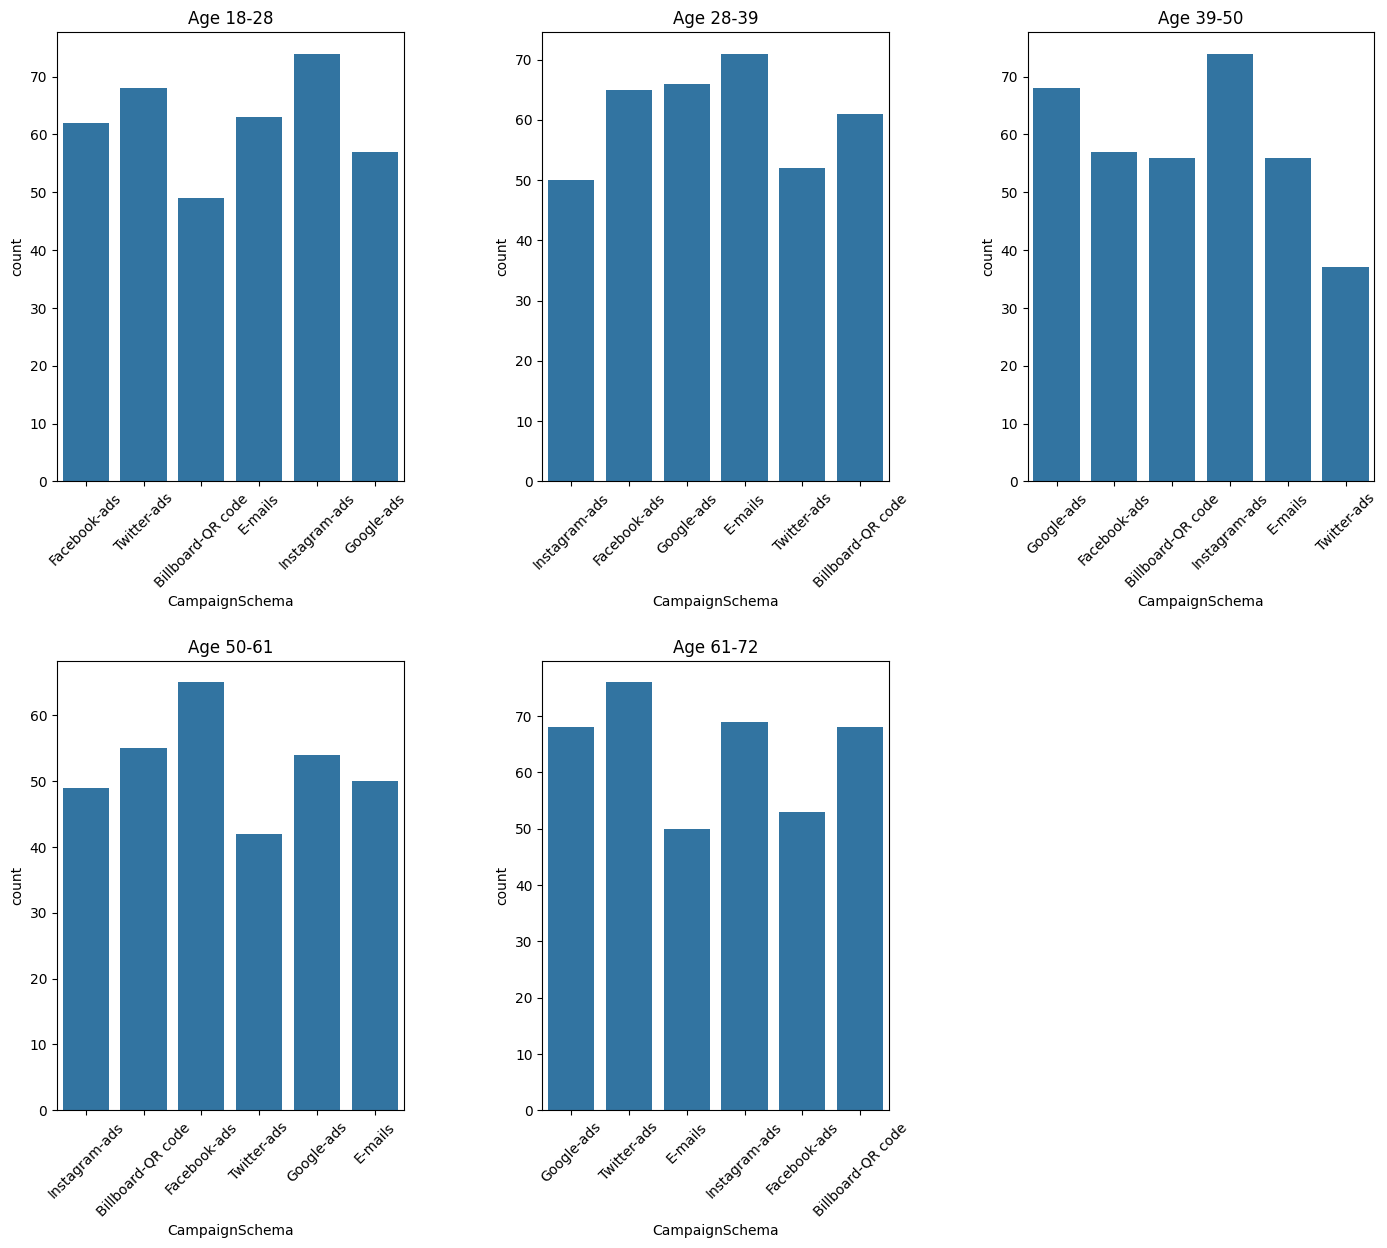

In [ ]:
#plot to understand through which campaign schems people from diff age groups came across the products

plt.figure(figsize=(17,14))
plt.subplots_adjust(hspace=0.4 ,wspace=0.4)

plt.subplot(231)
sns.countplot(x=age_18_28['CampaignSchema'])
plt.title('Age 18-28')
plt.xticks(rotation=45)

plt.subplot(232)
sns.countplot(x=age_28_39['CampaignSchema'])
plt.title('Age 28-39')
plt.xticks(rotation=45)

plt.subplot(233)
sns.countplot(x=age_39_50['CampaignSchema'])
plt.title('Age 39-50')
plt.xticks(rotation=45)

plt.subplot(234)
sns.countplot(x=age_50_61['CampaignSchema'])
plt.title('Age 50-61')
plt.xticks(rotation=45)

plt.subplot(235)
sns.countplot(x=age_61_72['CampaignSchema'])
plt.title('Age 61-72')
plt.xticks(rotation=45)
plt.show()  